## Multiple Linear Regression:

The aim is to predict the weight of fish.

In [1]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
#read the file
fish_data = pd.read_csv('Fish.csv')
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
#shape of the df:
fish_data.shape

(159, 7)

In [5]:
#info of the df
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
fish_data.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
5%,9.800000,11.300000,11.800000,13.100000,2.203560,1.283140
10%,29.580000,13.440000,14.620000,16.160000,3.764800,2.227840
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
90%,930.000000,38.200000,41.200000,45.340000,15.190400,6.742100


#### Let us understand the data given:

In [7]:
#let us check for null
fish_data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

There is no null in the data set.

1. `Species` column:

In [8]:
fish_data.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

We see some 7 variety of fish species.

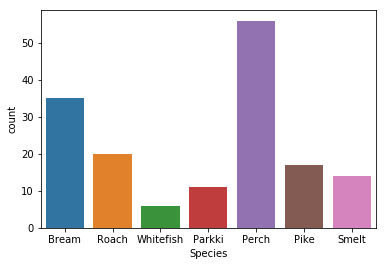

In [9]:
sns.countplot(data = fish_data, x = 'Species')

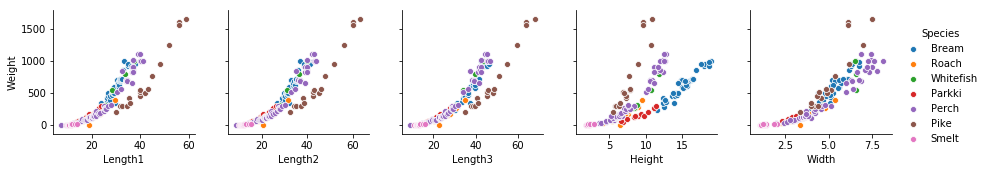

In [10]:
sns.pairplot(data= fish_data, x_vars = ['Length1','Length2','Length3','Height','Width'], y_vars = 'Weight', hue = 'Species')

As we see, our dependent variable-'weight' has linear relationship with all other variables.

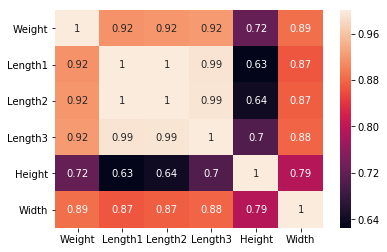

In [11]:
#let us check the correlation
sns.heatmap(fish_data.corr(), annot = True)

We see that there are high correlation between variables going on.

2. `Weight` column:

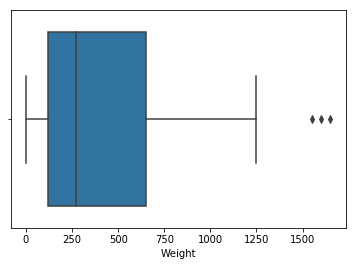

In [12]:
#Variable Weight
sns.boxplot(fish_data['Weight'])

We see few outliers. Let us check the row with outliers value:

In [13]:
#checking outlier rows
fish_weight = fish_data['Weight']
Q3 = fish_weight.quantile(0.75)
Q1 = fish_weight.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 +(1.5*IQR)

In [14]:
weight_outliers = fish_weight[(fish_weight <lower_limit) | (fish_weight >upper_limit)]
weight_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

We see three rows with outliers value.

3. `Length1` column:

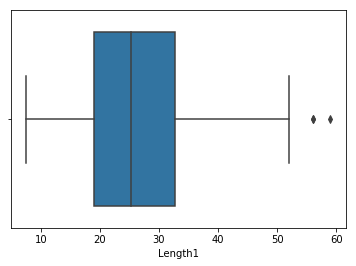

In [15]:
sns.boxplot(fish_data['Length1'])

In [16]:
#checking outlier rows
fish_Length1 = fish_data['Length1']
Q3 = fish_Length1.quantile(0.75)
Q1 = fish_Length1.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 +(1.5*IQR)
length1_outliers = fish_Length1[(fish_Length1 <lower_limit) | (fish_Length1 >upper_limit)]
length1_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

4. `Length2` column:

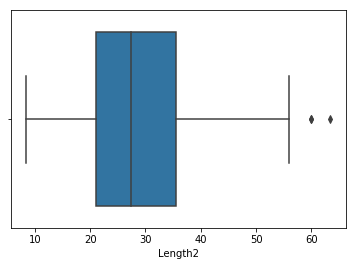

In [17]:
sns.boxplot(fish_data['Length2'])

In [18]:
#checking outlier rows
fish_Length2 = fish_data['Length2']
Q3 = fish_Length2.quantile(0.75)
Q1 = fish_Length2.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 +(1.5*IQR)
length2_outliers = fish_Length2[(fish_Length2 <lower_limit) | (fish_Length2 >upper_limit)]
length2_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

5. `Length3` column:

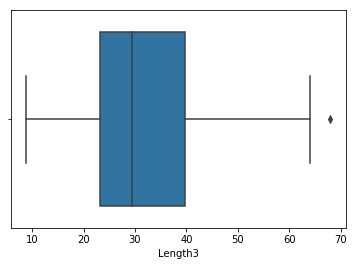

In [19]:
sns.boxplot(fish_data['Length3'])

In [20]:
#checking outlier rows
fish_Length3 = fish_data['Length3']
Q3 = fish_Length3.quantile(0.75)
Q1 = fish_Length3.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 +(1.5*IQR)
length3_outliers = fish_Length3[(fish_Length3 <lower_limit) | (fish_Length3 >upper_limit)]
length3_outliers

144    68.0
Name: Length3, dtype: float64

6. `Height` column:

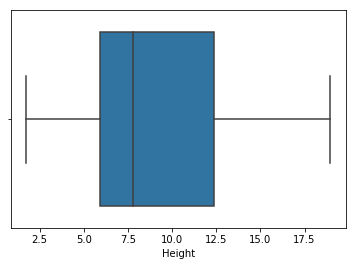

In [21]:
sns.boxplot(fish_data['Height'])

7. `Width` column:

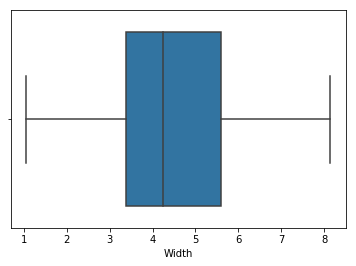

In [22]:
sns.boxplot(fish_data['Width'])

We see that all the outliers of the data set line in the row 142 to 144.

In [23]:
fish_data[142:145]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [24]:
#let us drop these rows:
df = fish_data.drop([142,143,144])

In [25]:
# let us check our df after removal of outliers
df.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,Weight,Length1,Length2,Length3,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
5%,9.800000,11.300000,11.800000,13.100000,2.202300,1.282150
10%,25.950000,13.350000,14.500000,16.100000,3.676000,2.167600
25%,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
90%,900.000000,37.200000,40.000000,44.350000,15.283250,6.685400


#### Data prepartion:

In [26]:
#creating dummies - to handle categorical variable.
#species_dummies = pd.get_dummies(df['Species'], prefix = 'Species' , drop_first = True)

In [27]:
# final_df = pd.concat([df,species_dummies], axis =1)
# final_df.head()

In [28]:
#dropping the original column as we have created dummies
#final_df = final_df.drop(['Species'], axis =1)

In [29]:
#final_df.shape

#### Let us split the data into train and test data:

In [30]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state =100)

In [31]:
df_train.shape

(109, 7)

In [32]:
df_test.shape

(47, 7)

#### Rescaling the data:
As we see columns with different place value. Let us rescale it:

In [33]:
scaler = StandardScaler()

In [34]:
scaling_columns = ['Weight', 'Length1','Length2','Length3','Height','Width']
df_train[scaling_columns] = scaler.fit_transform(df_train[scaling_columns])
df_train.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
mean,-7.435439e-17,-4.532562e-16,3.422339e-16,-1.604221e-16,-1.120409e-16,6.783565e-16
std,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00
min,-1.199558e+00,-2.046666e+00,-2.041347e+00,-2.099509e+00,-1.717329e+00,-2.103873e+00
25%,-7.910930e-01,-7.223342e-01,-6.861065e-01,-6.849360e-01,-6.908023e-01,-5.914474e-01
50%,-2.541097e-01,-1.465376e-01,-1.483127e-01,-1.151774e-01,-2.821373e-01,-8.533238e-03
75%,7.124603e-01,7.401891e-01,7.659368e-01,8.376947e-01,6.820739e-01,6.026302e-01
max,2.717198e+00,2.651834e+00,2.615948e+00,2.448736e+00,2.425682e+00,2.183778e+00


#### Model building:

In [35]:
y_train = df_train['Weight']
X_train = df_train.iloc[:,2:7]

In [36]:
X_train.head()

,Length1,Length2,Length3,Height,Width
37,-0.895073,-0.922736,-0.881404,-0.774584,-0.911425
6,0.175908,0.249655,0.425111,1.333776,0.700756
25,0.751705,0.819716,1.053810,1.868102,1.226832
21,0.705641,0.712157,0.886812,1.778316,0.763163
114,1.062635,1.034834,0.906459,0.514217,1.370387


Let us initial build the model with statsmodel.api :

#### Model 1:

In [37]:
X_train_sm = sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train_sm).fit()

In [38]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     190.5
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           2.21e-50
Time:                        17:18:36   Log-Likelihood:                -27.836
No. Observations:                 109   AIC:                             67.67
Df Residuals:                     103   BIC:                             83.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.633e-17      0.031  -2.48e-15      1.0

We see some high p-values. Certainly certain variables are insignificant. Let us calculate VIF.

In [39]:
VIF = pd.DataFrame()
VIF['Features'] = X_train.columns
VIF['vif'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF['vif'] = round(VIF['vif'] ,2)
VIF = VIF.sort_values(by='vif',ascending = False)
VIF

,Features,vif
1,Length2,1559.60
0,Length1,1264.50
2,Length3,285.85
3,Height,11.86
4,Width,10.33


Let us drop the column Length2 as it has high VIF and p-value.

#### Model 2:

In [40]:
X2 = X_train.drop(['Length2'], axis =1)
X2_sm = sm.add_constant(X2)

model2 = sm.OLS(y_train,X2_sm).fit()

In [41]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     231.0
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           8.65e-51
Time:                        17:18:36   Log-Likelihood:                -29.797
No. Observations:                 109   AIC:                             69.59
Df Residuals:                     104   BIC:                             83.05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.633e-17      0.031  -2.45e-15      1.0

In [42]:
#vif
VIF = pd.DataFrame()
VIF['Features'] = X2.columns
VIF['vif'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
VIF['vif'] = round(VIF['vif'] ,2)
VIF = VIF.sort_values(by='vif',ascending = False)
VIF

,Features,vif
1,Length3,242.95
0,Length1,225.81
2,Height,11.79
3,Width,9.18


Let us drop the column Length3 as it has high VIF.

#### Model 3:

In [43]:
X3 = X2.drop(['Length3'], axis =1)
X3_sm = sm.add_constant(X3)

model3 = sm.OLS(y_train,X3_sm).fit()

In [44]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     283.6
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           3.43e-50
Time:                        17:18:36   Log-Likelihood:                -34.298
No. Observations:                 109   AIC:                             76.60
Df Residuals:                     105   BIC:                             87.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.633e-17      0.032  -2.36e-15      1.0

In [45]:
#vif
VIF = pd.DataFrame()
VIF['Features'] = X3.columns
VIF['vif'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
VIF['vif'] = round(VIF['vif'] ,2)
VIF = VIF.sort_values(by='vif',ascending = False)
VIF

,Features,vif
2,Width,6.88
0,Length1,4.15
1,Height,2.82


Model 3 has all significant variables. All the VIF values and p-values are in a good range. Also the Adjusted R-squared is 88.7%. This model is explaining most of the variance without being too complex.

So our equation is:

#### Weight = 0.00000000000000000633 + 0.4184 * Length1 + Height * 0.2538 + Width * 0.3512

#### Residual analysis:

In [46]:
y_train_pred = model3.predict(X3_sm)
y_train_pred.head()

37    -0.891215
6      0.658271
25     1.219574
21     1.014653
114    1.056440
dtype: float64

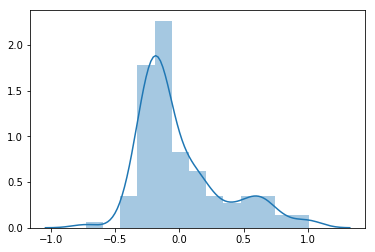

In [47]:
residual = y_train - y_train_pred
sns.distplot(residual)

Error term is normally distributed.

Text(0.5, 1.0, 'Test(Blue) vs pred(Red)')

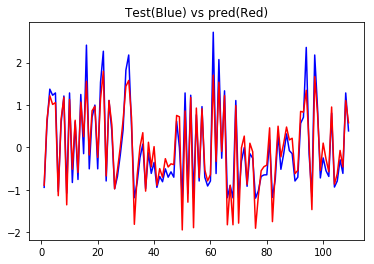

In [48]:
#plotting y_train and y_train_pred
c = [i for i in range(1,110,1)]
plt.plot(c, y_train,color = 'Blue')
plt.plot(c, y_train_pred,color = 'red')
plt.title('Test(Blue) vs pred(Red)')

Looking at the graph we see that, the peak values are not explained properly by the model.

#### Making Predictions:

In [49]:
# treating test columns same way as train dataset
df_test[scaling_columns] = scaler.transform(df_test[scaling_columns])
df_test.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,0.406783,0.146506,0.145529,0.129990,0.174519,0.291103
std,1.386265,1.153926,1.163420,1.156686,1.179970,1.383755
min,-1.220680,-1.839380,-1.890765,-1.903040,-1.714780,-2.172324
25%,-0.800043,-0.716576,-0.696862,-0.724230,-0.602990,-0.592772
50%,-0.146713,0.072265,0.066805,0.100938,-0.101342,0.060053
75%,1.750628,1.045361,1.115503,1.098015,0.933590,1.590203
max,3.254181,3.077923,3.078450,2.900614,2.504489,2.645274


In [50]:
y_test = df_test['Weight']
X_test = df_test.iloc[:,2:7]

In [51]:
cols = X3.columns
cols

Index(['Length1', 'Height', 'Width'], dtype='object')

In [52]:
# considering only those columns which was part of our model 3.
X_test = X_test[cols]
X_test.columns

Index(['Length1', 'Height', 'Width'], dtype='object')

In [53]:
#predicting
X_test_sm = sm.add_constant(X_test)
y_pred = model3.predict(X_test_sm)

In [54]:
y_pred.head()

45    -0.437544
11     0.651100
122    1.287522
15     0.933728
127    1.794807
dtype: float64

#### Evaluating:

In [55]:
r_square = r2_score(y_test,y_pred)
r_square

0.8839914021264155

Our Adj.R-square for train set is 88.7% and R-square for test set is 88.39%.

Text(0.5, 1.0, 'Test(Blue) vs pred(Red)')

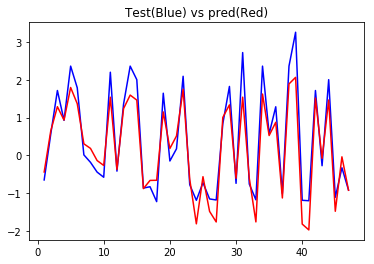

In [56]:
#plotting y_test and y_pred
c = [i for i in range(1,48,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred,color = 'red')
plt.title('Test(Blue) vs pred(Red)')

From the above graph we see that- lower and upper tips are not predicted properly by the model.